In [1]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import platform 

print(f"Python version: {platform.python_version}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"Notebook last run: {datetime.datetime.now()}")

2023-07-27 10:35:39.109600: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-27 10:35:39.149078: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-27 10:35:39.149770: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-27 10:35:39.961719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Python version: <function python_version at 0x7f3476dfb7f0>
TensorFlow version: 2.13.0
Keras version: 2.13.1
Notebook last run: 2023-07-27 10:35:41.301297


# Configuring Tensorboard

In [2]:
# Load the Tensorboard notebook extension
%load_ext tensorboard

In [3]:
# Clear any logs from previous runs
!rm -rf ./.logs/

# Load Data

In [4]:
mnist_dataset = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()

In [5]:
# Validation and Test data
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=29)

In [6]:
print(f"""
X_train: {X_train.shape}
y_train: {y_train.shape}

X_validation: {X_validation.shape}
y_validation: {y_validation.shape}

X_test: {X_test.shape}
y_test: {y_test.shape}
""")


X_train: (60000, 28, 28)
y_train: (60000,)

X_validation: (5000, 28, 28)
y_validation: (5000,)

X_test: (5000, 28, 28)
y_test: (5000,)



In [7]:
X_train[0].shape

(28, 28)

In [8]:
(_, IMG_WIDTH, IMG_HEIGHT) = X_train.shape
IMG_CHANNELS = 1
BATCH_SIZE = 32
EPOCHS = 100

print(f"Image width: {IMG_WIDTH}")
print(f"Image height: {IMG_HEIGHT}")
print(f"Image channels: {IMG_CHANNELS}")

Image width: 28
Image height: 28
Image channels: 1


# Explore the data

In [9]:
%matplotlib inline

In [10]:
y_train[29]

7

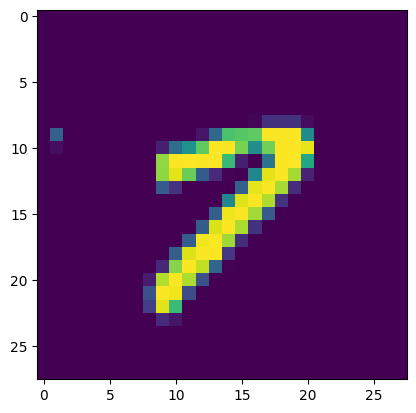

In [11]:
plt.imshow(X_train[29])

In [12]:
pd.DataFrame(X_train[29])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,37,37,7,0,0,0,0,0,0,0
9,0,78,0,0,0,0,0,0,0,0,...,254,254,124,0,0,0,0,0,0,0


Text(0.5, 1.0, '1')

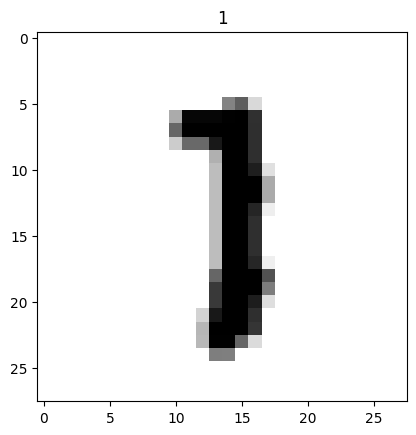

In [13]:
plt.imshow(X_train[3456], cmap=plt.cm.binary)
plt.title(y_train[3456])

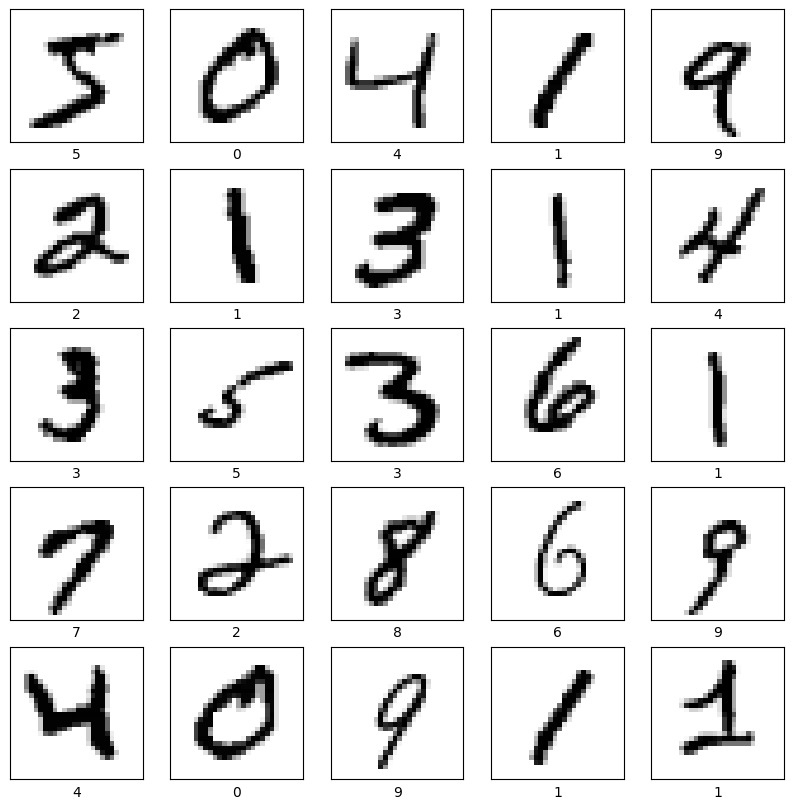

In [14]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 10))

for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

# Reshaping the data

In [15]:
(X_train.shape[0],
    IMG_WIDTH,
    IMG_HEIGHT,
    IMG_CHANNELS)

(60000, 28, 28, 1)

In [16]:
X_train = X_train.reshape(
    X_train.shape[0],
    IMG_WIDTH,
    IMG_HEIGHT,
    IMG_CHANNELS
)

X_validation = X_validation.reshape(
    X_validation.shape[0],
    IMG_WIDTH,
    IMG_HEIGHT,
    IMG_CHANNELS
)

X_test = X_test.reshape(
    X_test.shape[0],
    IMG_WIDTH,
    IMG_HEIGHT,
    IMG_CHANNELS
)

In [17]:
X_train.shape, X_validation.shape, X_test.shape

((60000, 28, 28, 1), (5000, 28, 28, 1), (5000, 28, 28, 1))

In [18]:
X_train[0].shape, X_validation[0].shape, X_test[0].shape

((28, 28, 1), (28, 28, 1), (28, 28, 1))

# Normalize the data

In [19]:
X_train = X_train / 255
X_validation = X_validation / 255
X_test = X_test / 255

In [20]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [21]:
X_train[0].max(), X_train[0].min()

(1.0, 0.0)

# Build the model

Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model.

Then we will have two pairs of [Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable) layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer to convert multidimensional parameters to vector.

The las layer will be a [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

## Layers explain

`Convolution2D (Conv2D):`
A camada Convolution2D é uma camada de convolução 2D usada em redes neurais convolucionais (ConvNets). Ela é frequentemente usada para extrair características de imagens. A convolução 2D envolve a aplicação de um conjunto de filtros em uma imagem de entrada, onde cada filtro é responsável por detectar padrões específicos. Os filtros percorrem a imagem com uma janela deslizante, multiplicam seus valores pelos valores correspondentes da imagem e somam os resultados. Isso cria um mapa de características, que destaca as regiões relevantes da imagem.

`MaxPooling2D:`
A camada MaxPooling2D é usada para reduzir a dimensionalidade dos mapas de características gerados pelas camadas de convolução. Ela opera em janelas deslizantes, selecionando o valor máximo em cada região. Isso reduz o tamanho espacial dos mapas de características, preservando as características mais importantes. A redução da dimensionalidade ajuda a diminuir a quantidade de parâmetros na rede neural e a extrair características mais robustas.

`Flatten:`
A camada Flatten é usada para "achatar" os dados de entrada em um vetor unidimensional. Ela converte uma matriz de entrada multidimensional em um vetor, que pode ser usado como entrada para uma camada densa (totalmente conectada). Essa camada é comumente usada para conectar as camadas de convolução/max pooling às camadas densas finais da rede neural.

`Dense:`
A camada Dense é uma camada de rede neural totalmente conectada, em que cada neurônio na camada anterior está conectado a cada neurônio na camada seguinte. Ela é responsável por computar combinações lineares dos valores de entrada e aplicar uma função de ativação a essas combinações. A camada Dense é usada para aprendizado e tomada de decisão com base nos recursos extraídos pelas camadas anteriores.

`Dropout:`
A camada Dropout é usada para combater o overfitting em redes neurais. Ela desativa aleatoriamente um número especificado de neurônios durante o treinamento em cada passagem. Isso ajuda a prevenir a dependência excessiva de neurônios específicos e torna a rede neural mais robusta e menos suscetível a overfitting. O Dropout regulariza a rede, forçando-a a aprender representações redundantes dos dados, o que geralmente melhora o desempenho em dados de teste não vistos.

In [22]:
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

In [60]:
model = tf.keras.models.Sequential()

### Add Layers

#### Convolution 2D

- `input_shape`: Este parâmetro define a forma de entrada dos dados para a camada convolucional. No caso dado, a forma de entrada é (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS), onde IMG_WIDTH representa a largura da imagem de entrada, IMG_HEIGHT representa a altura da imagem de entrada e IMG_CHANNELS representa o número de canais de cor da imagem (geralmente 3 para imagens RGB).
<br><br>
- `kernel_size`: Este parâmetro especifica o tamanho do kernel ou filtro convolucional. No código fornecido, o valor é definido como 5, o que significa que o kernel convolucional terá uma dimensão de 5x5.
<br><br>
- `filters`: Este parâmetro indica o número de filtros convolucionais a serem aplicados na camada. No código dado, o valor é definido como 8, o que significa que haverá 8 filtros convolucionais.
<br><br>
- `strides`: Este parâmetro define o passo da convolução, ou seja, quantos pixels o filtro se move a cada passo. No código fornecido, o valor é definido como 1, o que significa que o filtro se moverá 1 pixel por vez.
<br><br>
- `activation`: Este parâmetro especifica a função de ativação a ser aplicada após a operação de convolução. No código dado, a função tf.keras.activations.relu é usada, que representa a ativação ReLU (Rectified Linear Unit), que é comumente usada para introduzir não-linearidade nas redes neurais convolucionais.
<br><br>
- `kernel_initializer`: Este parâmetro define o método de inicialização dos pesos do kernel convolucional. No código fornecido, tf.keras.initializers.VarianceScaling() é usado como inicializador de pesos, que inicializa os pesos de acordo com uma escala de variação, o que ajuda a melhorar a convergência durante o treinamento da rede.

In [61]:
# Convolution 2D
model.add(Convolution2D(
    input_shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

#### MaxPooling2D

- `pool_size`: Este parâmetro define o tamanho da janela de pooling. No código fornecido, o valor é definido como (2, 2), o que significa que será usada uma janela de pooling 2x2.
<br><br>
- `strides`: Este parâmetro define o passo da janela de pooling. No código fornecido, o valor é definido como (2, 2), o que significa que a janela de pooling será movida 2 pixels verticalmente e 2 pixels horizontalmente a cada passo.

In [62]:
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

In [63]:
model.add(Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [64]:
model.add(Flatten())

In [65]:
model.add(Dropout(.2))

#### Dense

- `units`: Este parâmetro define o número de unidades ou neurônios na camada densa. No código fornecido, o valor é definido como 10, o que significa que a camada densa terá 10 neurônios.
<br><br>
- `activation`: Este parâmetro especifica a função de ativação a ser aplicada às saídas da camada densa. No código dado, a função tf.keras.activations.softmax é usada como função de ativação. A função softmax é comumente usada na camada de saída de classificação multiclasse para normalizar as saídas em uma distribuição de probabilidade sobre as diferentes classes.
<br><br>
- `kernel_initializer`: Este parâmetro define o método de inicialização dos pesos da camada densa. No código fornecido, tf.keras.initializers.VarianceScaling() é usado como inicializador de pesos, que inicializa os pesos de acordo com uma escala de variação, assim como na camada de convolução.

In [66]:
model.add(Dense(
    units=10, 
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                      

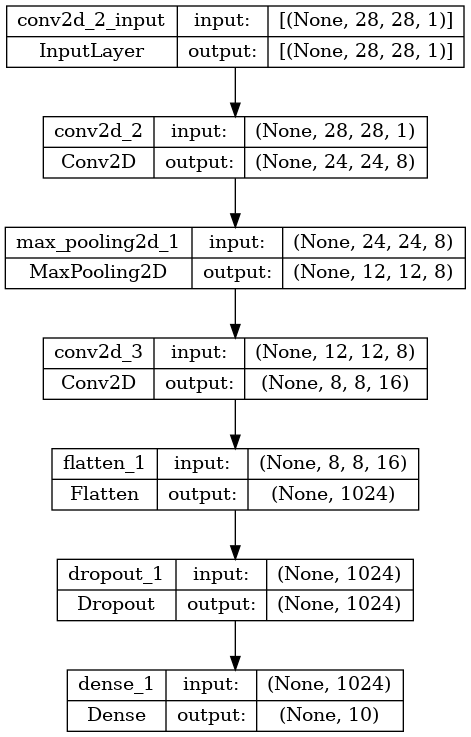

In [68]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True
)

# Compile the model

- `optimizer`: Esse parâmetro especifica o otimizador a ser usado durante o treinamento do modelo. No código fornecido, adam_optimizer é usado como otimizador. O adam_optimizer provavelmente é uma instância da classe tf.keras.optimizers.Adam, que é uma implementação do algoritmo de otimização Adam. O otimizador Adam é amplamente utilizado em redes neurais devido à sua eficiência e bons resultados em muitos cenários de aprendizado profundo.
<br><br>
- `loss`: Este parâmetro especifica a função de perda a ser usada durante o treinamento do modelo. No código fornecido, tf.keras.losses.sparse_categorical_crossentropy é usado como função de perda. Essa função de perda é comumente usada em tarefas de classificação multiclasse, onde as classes são representadas como rótulos inteiros (por exemplo, 0, 1, 2, ...) em vez de codificação one-hot.
<br><br>
- `metrics`: Esta lista especifica as métricas a serem avaliadas durante o treinamento e teste do modelo. No código fornecido, a lista contém apenas uma métrica, que é 'accuracy', indicando que a precisão será calculada durante o treinamento e teste do modelo.

In [37]:
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard, EarlyStopping

In [38]:
# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/EPOCHS))

In [42]:
# Create the Tensorboard callback
log_dir = f"./logs/fit/{datetime.datetime.now().strftime('%Y%m%d - %H%M%S')}"
tensorbard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1
)

In [43]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [44]:
history_1 = model.fit(X_train, y_train, 
                      epochs=100, 
                     validation_data=(X_validation, y_validation),
                     callbacks=[lr_scheduler, tensorbard_callback])

2023-07-27 10:43:34.898007: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5991 - accuracy: 0.8276 - val_loss: 0.2279 - val_accuracy: 0.9348 - lr: 1.0000e-04
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2255 - accuracy: 0.9342 - val_loss: 0.1404 - val_accuracy: 0.9586 - lr: 1.0233e-04
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1599 - accuracy: 0.9531 - val_loss: 0.1048 - val_accuracy: 0.9684 - lr: 1.0471e-04
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1233 - accuracy: 0.9632 - val_loss: 0.0810 - val_accuracy: 0.9762 - lr: 1.0715e-04
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1029 - accuracy: 0.9695 - val_loss: 0.0695 - val_accuracy: 0.9788 - lr: 1.0965e-04
Epoch 6/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0882 - accuracy: 0.9742 - val_loss: 0.0589 - val_accuracy: 0.9818 - lr: 1.1220e-04
Epoch 7/100
1875/1875 

In [45]:
history_1_df = pd.DataFrame(history_1.history)
history_1_df.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.599144,0.827633,0.227932,0.9348,0.000100
1,0.225536,0.934217,0.140383,0.9586,0.000102
2,0.159915,0.953050,0.104764,0.9684,0.000105
3,0.123326,0.963233,0.080977,0.9762,0.000107
4,0.102895,0.969467,0.069545,0.9788,0.000110


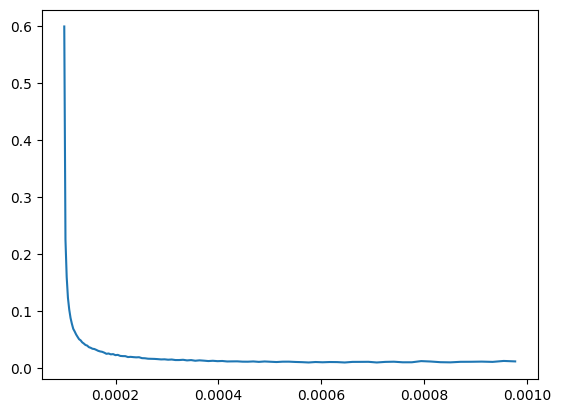

In [46]:
plt.plot(history_1_df['lr'], history_1_df['loss'])

In [47]:
min_loss = np.argmin(history_1_df['loss'])
min_loss

81

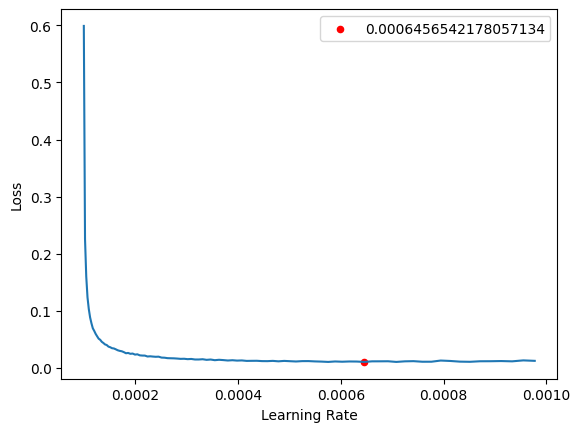

In [49]:
plt.plot(history_1_df['lr'], history_1_df['loss'])
plt.scatter(history_1_df['lr'][min_loss], history_1_df['loss'][min_loss], c='r', s=20, label=f"{history_1_df['lr'][min_loss]}")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.legend()

In [50]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9906


[0.04777444154024124, 0.9905999898910522]

In [51]:
# Create the EarlyStopping Callbacks
early_stopping_loss = EarlyStopping(
    monitor="val_loss",
    mode="min",
    verbose=1,
    patience=10
)

early_stopping_accuracy = EarlyStopping(
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    patience=10
)

In [69]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0006),
    metrics=["accuracy"]
)

In [70]:
history_2 = model.fit(
    X_train,
    y_train,
    verbose=1,
    epochs=EPOCHS,
    validation_data=(X_validation, y_validation),
    callbacks=[tensorbard_callback, early_stopping_loss, early_stopping_accuracy]
)

Epoch 1/100


2023-07-27 11:27:44.813431: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 11s 6ms/step - loss: 0.2495 - accuracy: 0.9244 - val_loss: 0.0763 - val_accuracy: 0.9744
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0828 - accuracy: 0.9744 - val_loss: 0.0549 - val_accuracy: 0.9832
Epoch 3/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0630 - accuracy: 0.9810 - val_loss: 0.0507 - val_accuracy: 0.9840
Epoch 4/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.0390 - val_accuracy: 0.9862
Epoch 5/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0448 - accuracy: 0.9864 - val_loss: 0.0342 - val_accuracy: 0.9892
Epoch 6/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0412 - val_accuracy: 0.9866
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0337 - val_accurac

In [71]:
history_2_df = pd.DataFrame(history_2.history)

<Axes: >

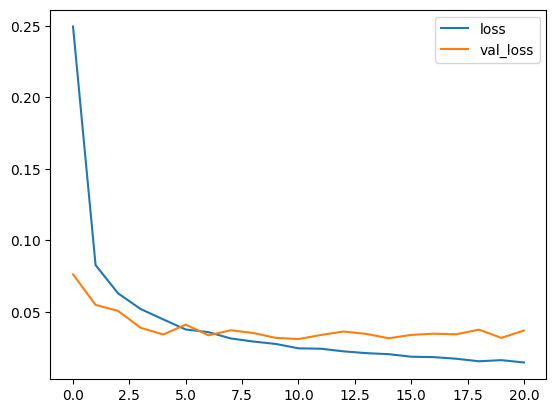

In [72]:
history_2_df[['loss', 'val_loss']].plot()

In [74]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

157/157 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9920


(0.02727930061519146, 0.9919999837875366)

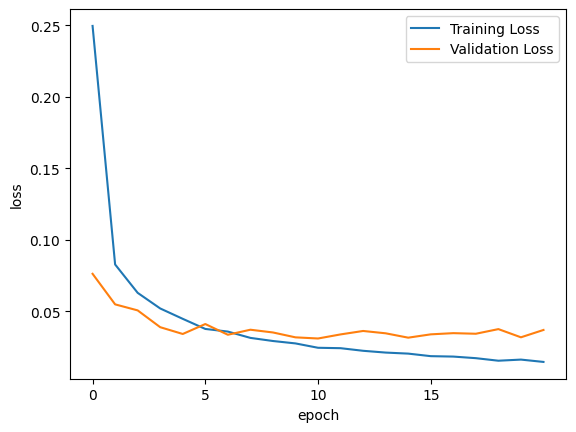

In [104]:
plt.plot(history_2_df['loss'], label="Training Loss")
plt.plot(history_2_df['val_loss'], label="Validation Loss")
plt.xticks(range(0, 20, 5))
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()

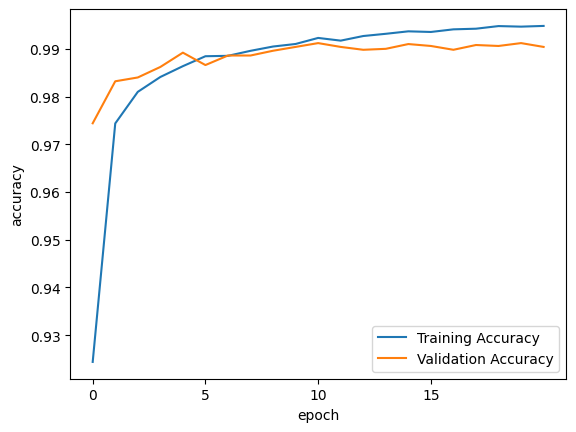

In [103]:
plt.plot(history_2_df['accuracy'], label="Training Accuracy")
plt.plot(history_2_df['val_accuracy'], label="Validation Accuracy")
plt.xticks(range(0, 20, 5))
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [107]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [118]:
y_probs = model.predict(X_test)
y_probs[:10], y_pred.shape

157/157 [==============================] - 0s 2ms/step


(array([[2.23069253e-20, 2.21417018e-19, 2.48709283e-13, 9.99999821e-01,
         3.21166273e-17, 9.04619810e-08, 5.73531476e-23, 8.94436868e-12,
         1.21350208e-10, 7.52548024e-12],
        [9.99994934e-01, 5.27966330e-16, 2.50392363e-11, 8.04471858e-17,
         1.90232032e-12, 2.26892515e-11, 4.98213376e-06, 3.04098129e-17,
         6.74490908e-10, 4.57733140e-09],
        [1.10941085e-06, 3.21654023e-11, 3.39525586e-12, 5.05887487e-13,
         1.83130108e-10, 5.18530624e-06, 9.99992192e-01, 1.17116202e-16,
         1.50144365e-06, 5.76252734e-09],
        [9.13280873e-20, 2.56696096e-14, 9.65019514e-13, 4.74336492e-16,
         5.91327897e-19, 1.35643380e-15, 4.04855086e-34, 9.99999940e-01,
         1.70952900e-20, 2.66179995e-10],
        [2.11981543e-09, 1.87250996e-11, 1.21737265e-09, 9.99994576e-01,
         2.56000042e-17, 4.04934980e-07, 1.74407303e-15, 1.23400571e-13,
         2.93400486e-08, 4.93753760e-06],
        [2.88419247e-18, 1.50073931e-09, 5.99999970e-16, 4.5

In [122]:
y_pred = np.argmax(y_probs, axis=1)

<Axes: >

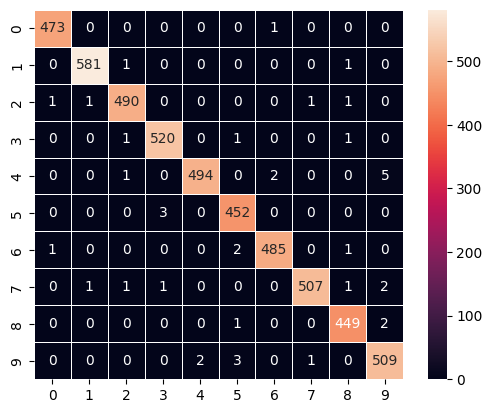

In [123]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
)